# Практическая работа №1: Краевая задача для уравнения II-го порядка.

Выполнила студентка гр. 9382 Круглова Виктория, вариант 26.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения
### Задача Коши
В общем виде:

$
\begin{cases}
    y^{(n)}=f(x,y,...,y^{(n-1)}) \\
    y(x_0)=y_{01} \\
    \dots \\
    y^{(n-1)}(x_0)=y_{0n} \\
\end{cases}
$

Также для решения задачи будет полезна такая форма:

$
\begin{cases}
    y'_1=f_1(x,y_1,...,y_n) \\
    \dots \\
    y'_n=f_n(x,y_1,...,y_n) \\
    y_1(x_0)=y_{01} \\
    \dots \\
    y_n(x_0)=y_{0n} \\
\end{cases}
$

Решение задачи Коши состоит в нахождении решения (интеграла) дифференциального уравнения, которое удовлетворяет начальным условиям.

### Краевая задача 

Задача о нахождении решения заданного дифференциального уравнения удовлетворяющего краевым условиям в концах интервала.

### Метод половинного деления
Используемый метод половинного деления для данной задачи будет отличаться от стандратного метода, который применяется для поиска корня уравнения (отличается только тем, что ищем не корень, а конкретное значение)

Имеются интервалы $[h_{low}, h_{up}]$ и $[y_{low}, y_{up}]$ и искомое значение $y_0$. Где функция y зависит от h.

Находится $h_{mid}$ среднее интервала $[h_{low}, h_{up}]$, если при таком $h_{mid}$, значение $y_{mid} > y_0$, тогда $h$ в интервале $[h_{mid}, h_{up}]$ уже не имеет смысла рассматривать, т.к. получится значение только большее чем $y_{mid}$ и $y_0$. Соответственно, если $y_{mid} < y_0$, то $h$ в интервале $[h_{low}, h_{mid}]$ тоже не имеет смысла рассматривать. Таким делением отрезка пополам идет приближение $h$, соответственно и $y$. Когда длина отрезка $[h_{low}, h_{up}]$ достигает нужной длины, алгоритм заканчивает работу.

## Постановка задачи

Дано дифференциальное уравнение:
$y''=f(x,y), a < x < b$ $\space\space\space(1)$ и граничные условия $y(a) = y_a, y(b) = y_b$    $\space\space\space(2)$

Требуется найти решение задачи (1)-(2) и построить его график.

Рассмотрим задачу Коши для уравнения (1) с начальными условиями 

$y(a) = y_a, y'(a) = h$     $\space\space\space(3)$

План решения основан на многократном решении задачи Коши $(1), (3)$.

Задача сводится к нахождению такого значения переменной h, при которой выполнено условие на правом конце отрезка, т.е. должно выполняться

$y(b,h) = y_b$





## Выполнение работы

Имеется дифференциальное уравнение:

$y'' = y^2tg\sqrt(x)$

С заданными краевыми значениями:

$y(0) = 3$ и $y(2) = 4$


Тогда задача Коши принимает вид:

$
\begin{cases}
    y''=f(x,y) \\
    y(0)=3 \\
    y'(0)=h \\
\end{cases}
$

Преобразуем задачу Коши для дифференциального уравнения второго порядка в задачу Коши двух дифференциальных уравнений первого порядка с начальными значениями:

$
\begin{cases}
    y_1'=y_2 \\
    y_2' = y^2tg\sqrt(x) \\
    y_1(0) = 3 \\
    y_2(0) = h \\
\end{cases}
$

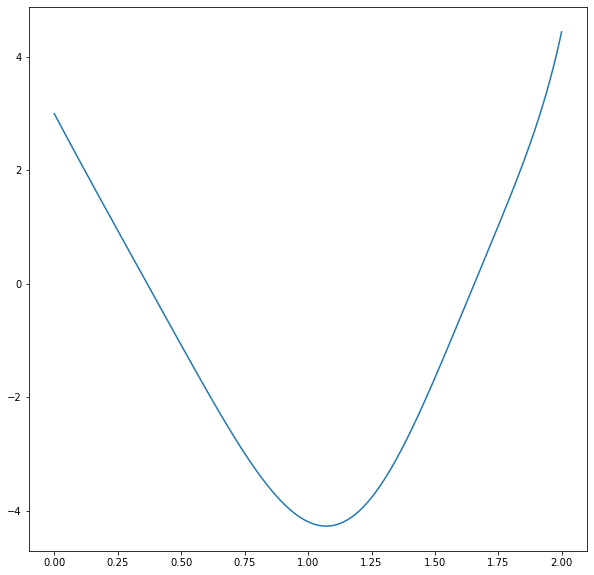

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y,x):
    return [y[1], y[0]*y[0]*np.tan(np.sqrt(x))]

h = -8.4
x_interval = np.arange(0, 2, 0.001)
sol_up = odeint(f, [3,h], x_interval)

plt.plot(x_interval, sol_up[:,0])

Для h =  -8.4, f(2) = 4.444747272108793, данное h возьмем за верхнюю границу.

Теперь найдем оценку снизу:

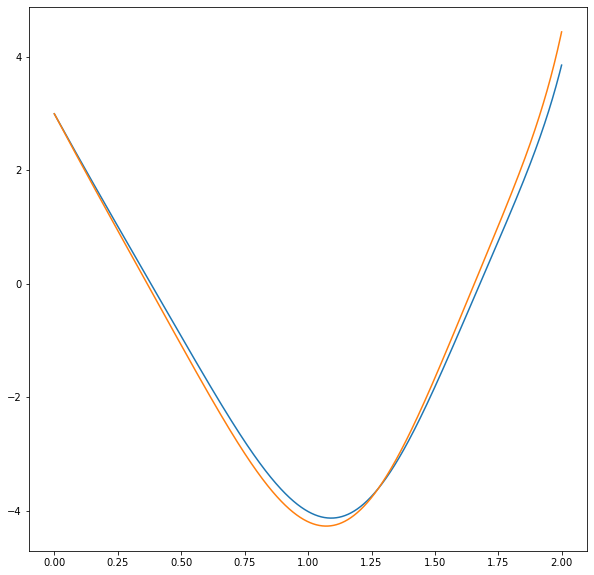

In [48]:
last_y = sol_up[-1,0]
while last_y > 4:
    h += 0.1
    sol_low = odeint(f, [3,h], x_interval)
    last_y = sol_low[-1,0]

plt.plot(x_interval, sol_low[:,0])
plt.plot(x_interval, sol_up[:,0])

Для h =  -8.1, f(2) = 3.8586536770209037, данное h возьмем за нижнюю границу.

Воспользуемся методом половинного деления для приближения h:

4.000357924186531
-8.17529296875


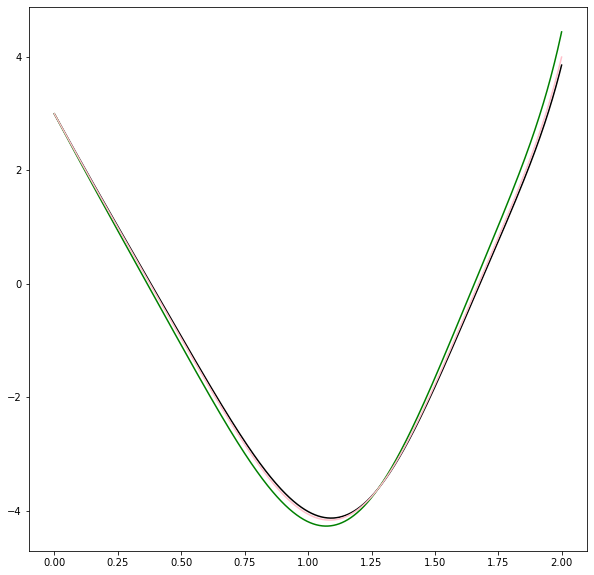

In [49]:
steps = 0
mid = 0
h_up = -8.4
h_low = -8.1
y_up = sol_up[-1,0]
y_low = sol_low[-1,0]
while abs(y_up - y_low) >= 0.001 and steps < 100:
    dh = (h_up - h_low)/2
    h_mid = h_low + dh
    mid = odeint(f, [3,h_mid], x_interval)
    if(mid[-1,0] > 4):
        h_up = h_mid
        y_up = mid[-1,0]
    else:
        h_low = h_mid
        y_low = mid[-1,0]
    steps += 1
if steps >= 100:
    print("too many steps")

plt.rcParams["figure.figsize"] = (10,10)
plt.plot(x_interval, sol_low[:,0], color="black")
plt.plot(x_interval, sol_up[:,0], color="green")
plt.plot(x_interval, mid[:,0], color="pink")
print(mid[-1,0])
print(h_mid)

Методом половинного деления было найдено значение $h=-8.17529296875$, при котором в точке $2$ функция f достигает значения $4.000357924186531$

## Выводы

Была решена краевая задача для уравнения второго порядка с помощью многократного решения задачи Коши. Были выбраны начальные оценки сверху и снизу, затем эти оценки уточнились методом половинного деления. Также из-за того, что решение краевой задачи существует не всегда, было введено ограничение на количество возможных итераций.